In [25]:
import numpy as np
import importlib
%matplotlib inline
import matplotlib.pyplot as plt
""" automatically reload included modules (need to run import command to trigger reloading) """
%load_ext autoreload
%autoreload 2
""" Controls for figure sizes to change """
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [16, 4]
plt.rcParams.update({'errorbar.capsize': 1})
import pickle
from train import *

args = parser.parse_args("")
# query if we have GPU
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print('Using device:', dev)
args.dev = dev

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using device: cpu


## Training history

In [83]:
from matplotlib import ticker

# load training history and display plots, apply EWA
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)

with open('history_val.pkl', 'rb') as f:
    history_val = pickle.load(f)

with open('history_ewa.pkl', 'rb') as f:
    history_ewa = pickle.load(f)

train_loss_batch = history['train_loss_batch']
train_acc_batch = history['train_acc_batch']

val_loss = history_val['val_loss']
val_acc = history_val['val_acc']

ewa_loss = history_ewa['ewa_loss']
ewa_acc = history_ewa['ewa_acc']
print(ewa_acc.shape)

(30, 1688)


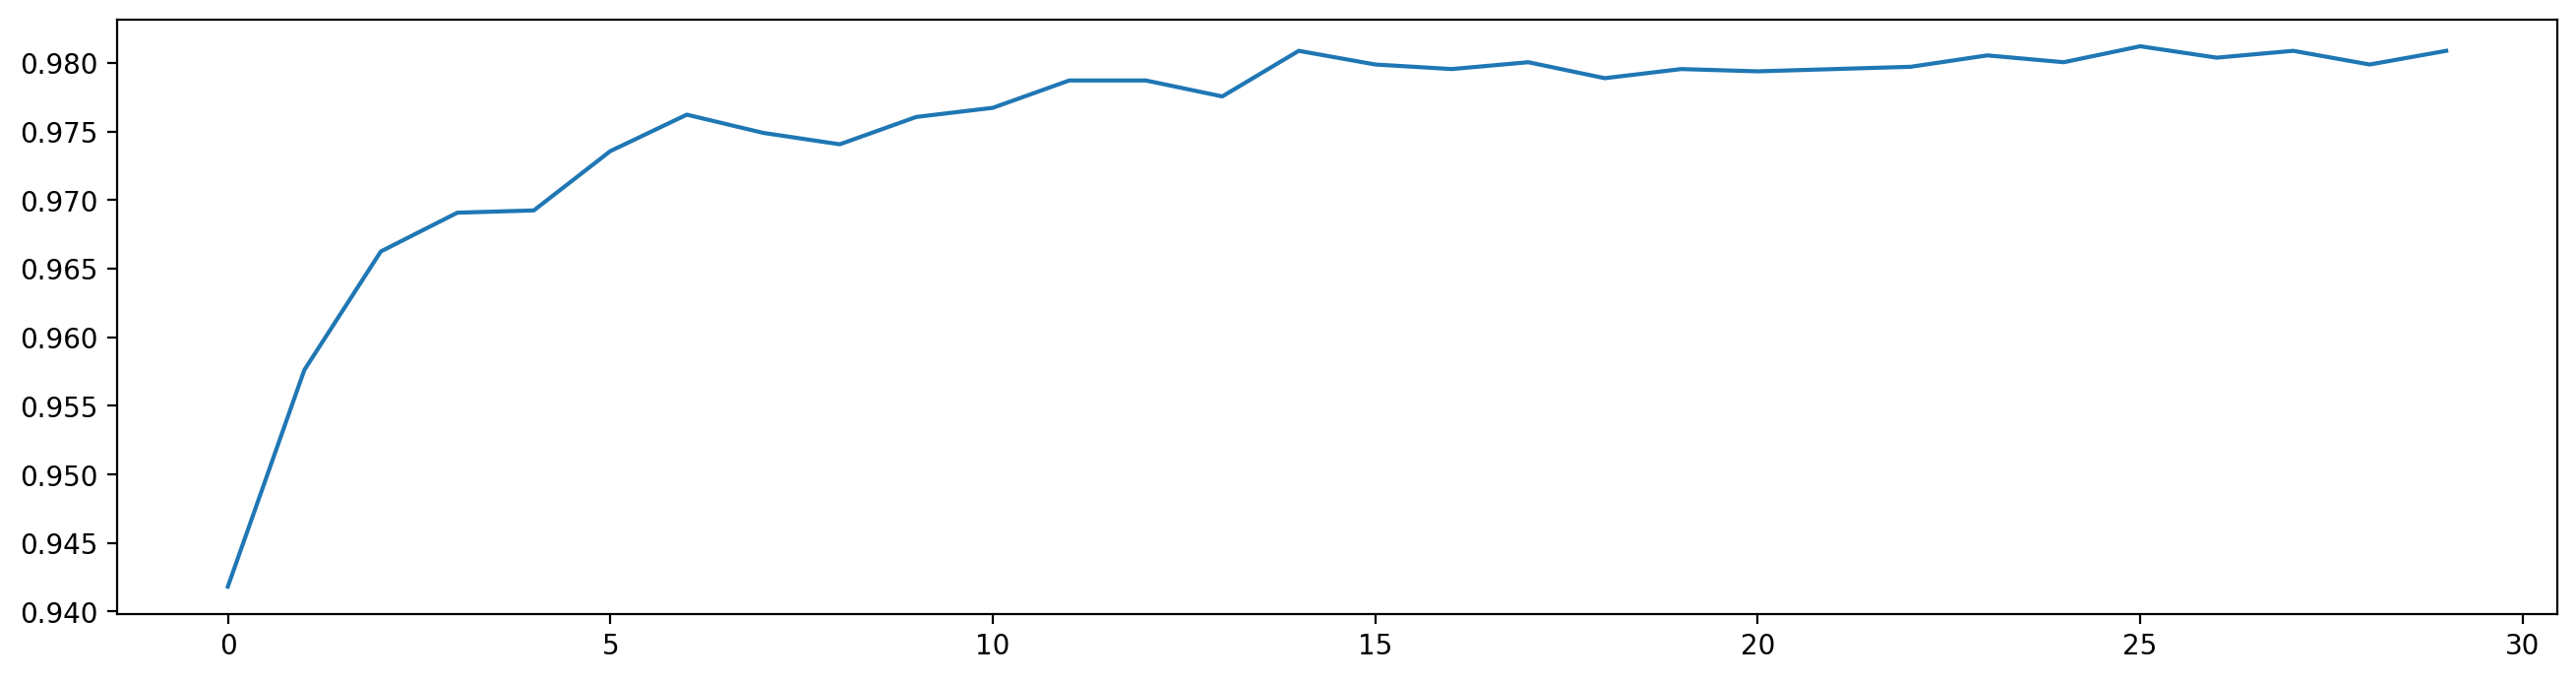

In [84]:
# plot lines
plt.plot(val_acc, label = "Validation Acc")

In [85]:
ewa_loss = ewa_loss.flatten()
train_loss = train_loss_batch.flatten()
ewa_acc = ewa_acc.flatten()
train_acc = train_acc_batch.flatten()

In [73]:
x_axis_train = np.arange(0, 30, 1/1688)
x_axis_train

array([0.00000000e+00, 5.92417062e-04, 1.18483412e-03, ...,
       2.99982227e+01, 2.99988152e+01, 2.99994076e+01])

In [74]:
x_axis_train.shape

(50640,)

In [59]:
x_axis_val = np.arange(0, 30)
x_axis_val

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

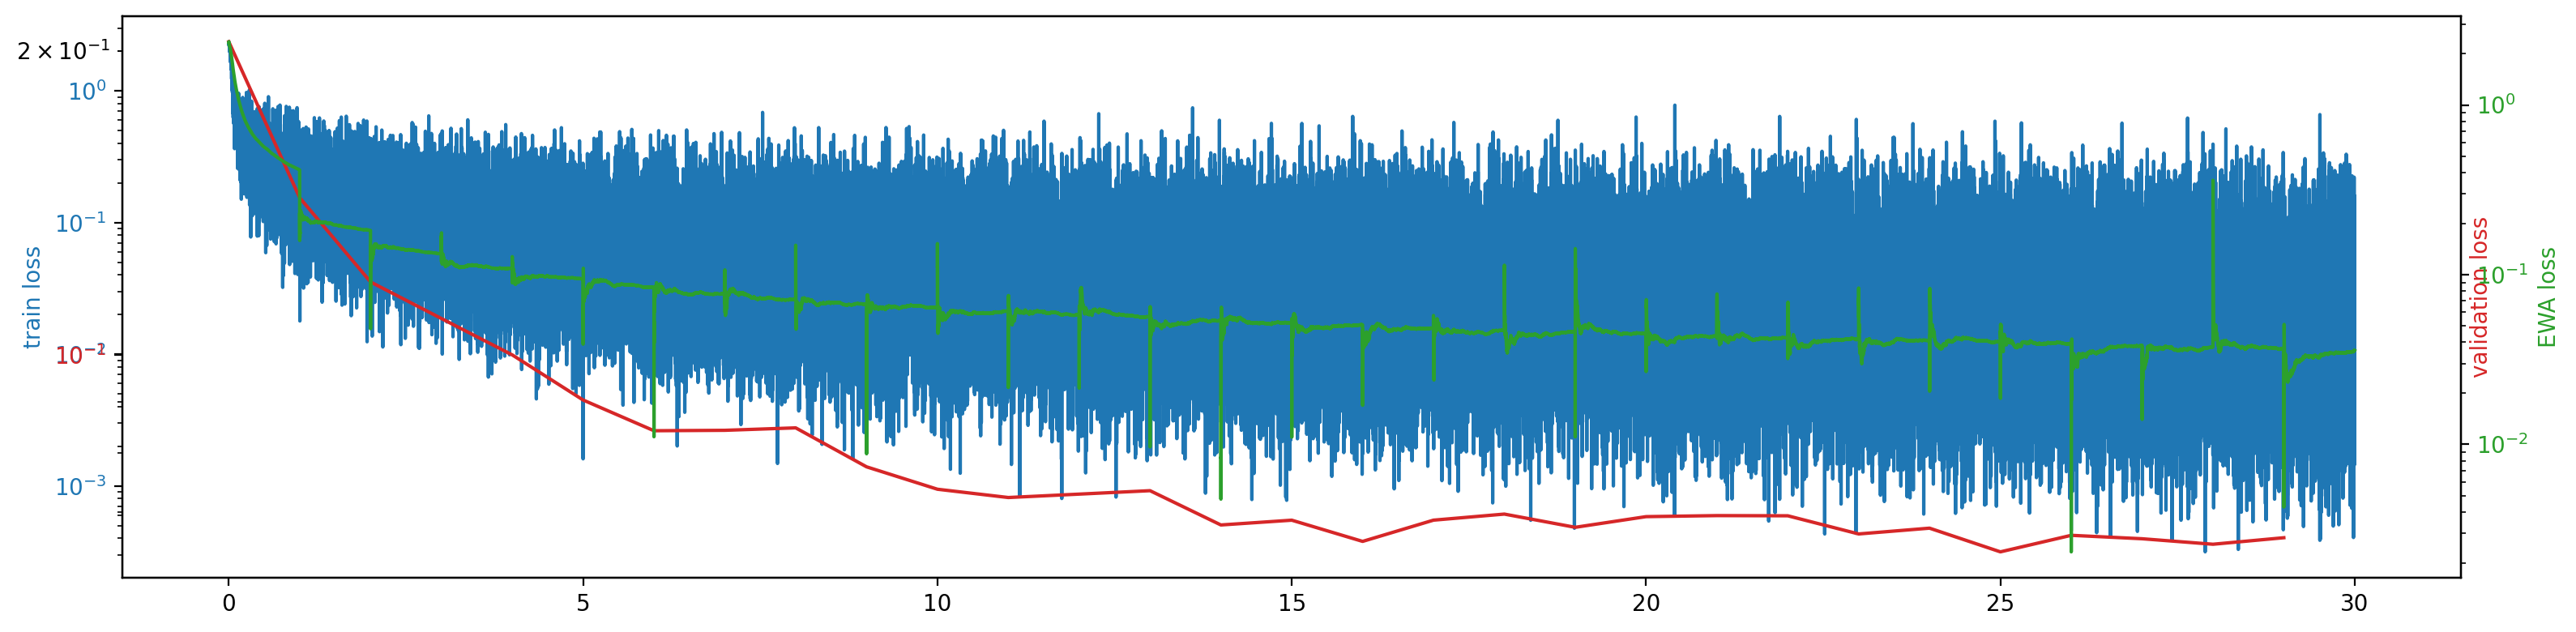

In [81]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_ylabel('train loss', color=color)  # we already handled the x-label with ax1
ax1.plot(x_axis_train, train_loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.yscale('log')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_xlabel('epochs')
ax2.set_ylabel('validation loss', color=color)
ax2.plot(x_axis_val, val_loss, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.yscale('log')

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax3.set_ylabel('EWA loss', color=color)  # we already handled the x-label with ax1
ax3.plot(x_axis_train, ewa_loss, color=color)
ax3.tick_params(axis='y', labelcolor=color)
plt.yscale('log')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

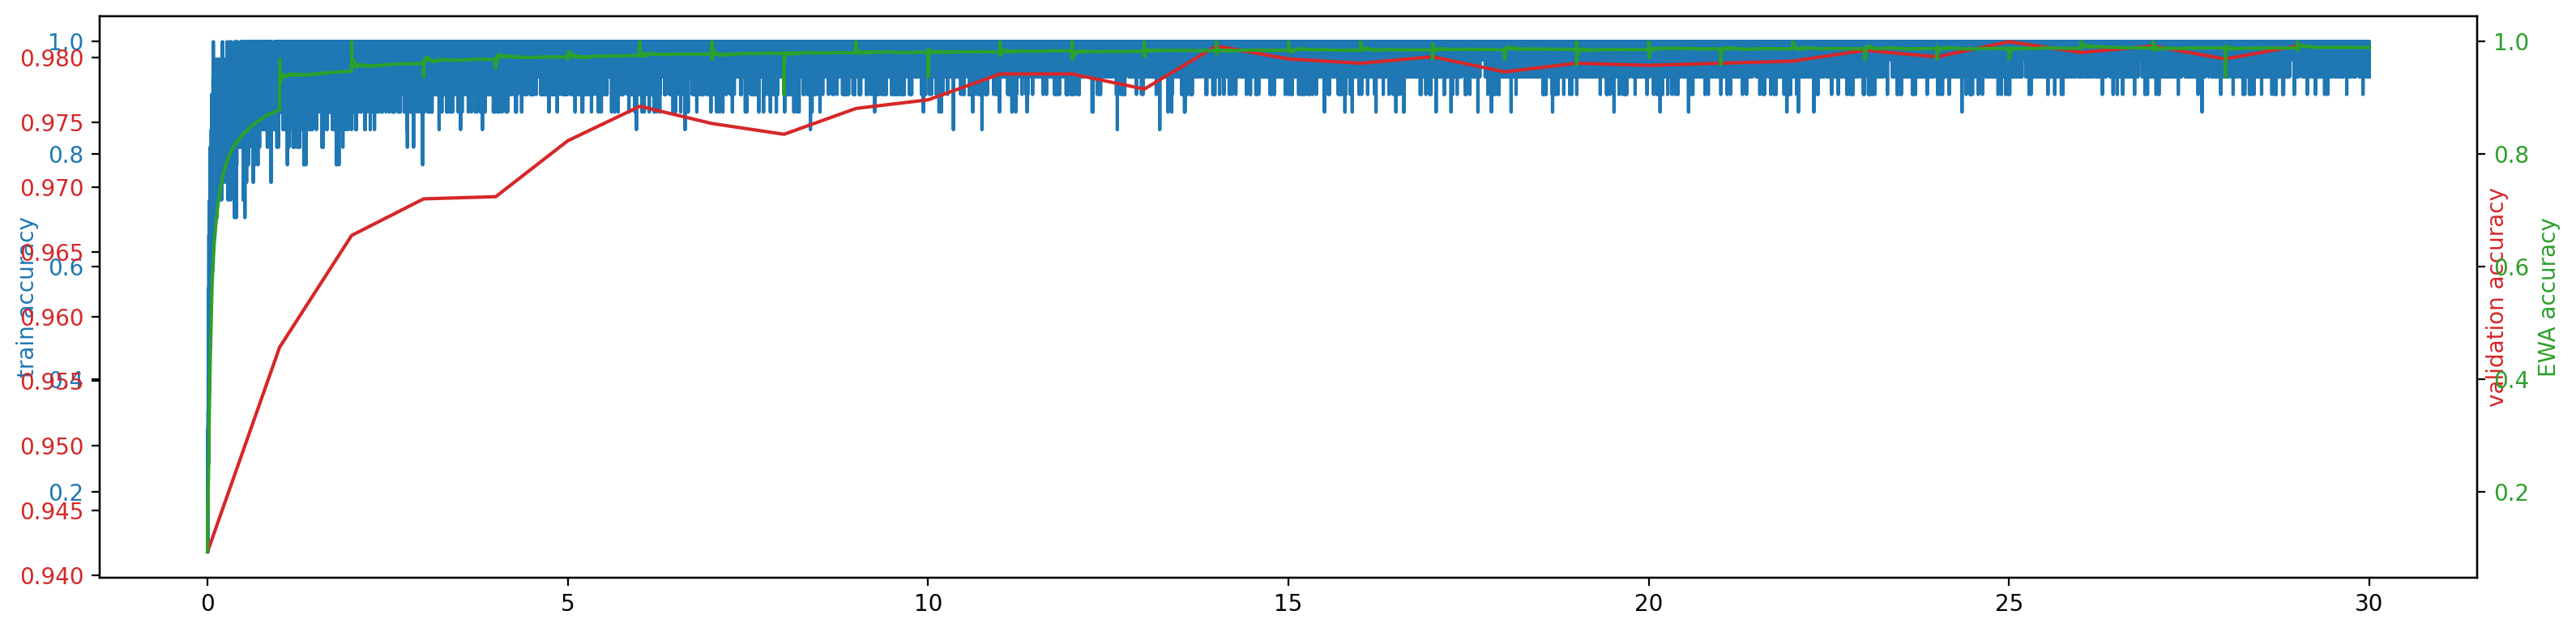

In [86]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_ylabel('train accuracy', color=color)  # we already handled the x-label with ax1
ax1.plot(x_axis_train, train_acc, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_xlabel('epochs')
ax2.set_ylabel('validation accuracy', color=color)
ax2.plot(x_axis_val, val_acc, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax3.set_ylabel('EWA accuracy', color=color)  # we already handled the x-label with ax1
ax3.plot(x_axis_train, ewa_acc, color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()